
#  Bootstrap Aggregating (Bagging)  and Random Forest  for classification with Python

Estimated time needed: **45** minutes

## Objectives

After completing this lab you will be able to:

* Understand Bootstrap sampling
* Understand  Model Instability  
* Apply Bagging
* Understand when to use Bagging


In this notebook, you will learn the process of Bagging  (Bootstrap Aggregation)  and Random Forest 

<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol>
        <li><a href="https://#about_dataset">About the dataset</a></li>
        <li><a href="https://#preprocessing">Data pre-processing and selection</a></li>
        <li><a href="https://#modeling">Modeling (Logistic Regression with Scikit-learn)</a></li>
        <li><a href="https://#evaluation">Evaluation</a></li>
        <li><a href="https://#practice">Practice</a></li>
    </ol>
</div>
<br>
<hr>


Let's first import required libraries:


In [5]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0
# Note: If your environment doesn't support "!mamba install", use "!pip install" 
! pip install pydotplus 

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=adb0adc10faff96586773f4ca7aa64ea6b20f8a7cd85ca811791f9c8af55ca7a
  Stored in directory: c:\users\rmt10\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [2]:
# Library for reading in data and using dataframes
import pandas as pd
# Using numpy arrays
import numpy as np
# Data preprocessing functions like LabelEncoder
from sklearn import preprocessing
%matplotlib inline
# Visualizations
import matplotlib.pyplot as plt
# Model accuracy
from sklearn import metrics
# Surpress numpy data type warnings
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
# Give loops a progress bar
from tqdm import tqdm

This function calculates the train and test accuracy of a model

In [3]:
def get_accuracy(X_train, X_test, y_train, y_test, model):
    return  {"test Accuracy":metrics.accuracy_score(y_test, model.predict(X_test)),"train Accuracy": metrics.accuracy_score(y_train, model.predict(X_train))}

This function creates visualizations of decision trees

In [6]:
# Plot tree helper libraries
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree


def plot_tree(model,filename = "tree.png"):
    #global churn_df 

    dot_data = StringIO()
  

    featureNames = [colunm  for colunm in churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']].columns]
    out=tree.export_graphviz(model,feature_names=featureNames, out_file=dot_data, class_names= ['left','stay'], filled=True,  special_characters=True,rotate=False)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    graph.write_png(filename)
    img = mpimg.imread(filename)
    plt.figure(figsize=(100, 200))
    plt.imshow(img,interpolation='nearest')

This function creates a graph of training accuracy vs how many estimators (Decision Trees) a BaggingClassifier uses

In [7]:
def get_accuracy_bag(X,y,title,times=20,xlabel='Number Estimators'):
    #Iterate through different number of estimators and average out the results  


    N_estimators=[n for n in range(1,70)]
    times=20
    train_acc=np.zeros((times,len(N_estimators)))
    test_acc=np.zeros((times,len(N_estimators)))
    
    train_time=np.zeros((times,len(N_estimators)))
    test_time=np.zeros((times,len(N_estimators)))
     #average out the results
    for n in tqdm(range(times)):
        X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
        for n_estimators in N_estimators:
            #Iterate through different number of estimators and average out the results   
        
            Bag= BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 10),n_estimators=n_estimators,bootstrap=True,random_state=0)
            Bag.fit(X_train,y_train)
          
            
             
            Accuracy=get_accuracy(X_train, X_test, y_train, y_test,  Bag)
           
            
            
  
            train_acc[n,n_estimators-1]=Accuracy['train Accuracy']
            test_acc[n,n_estimators-1]=Accuracy['test Accuracy']
        
        
        
    fig, ax1 = plt.subplots()

    ax2 = ax1.twinx()
    ax1.plot(train_acc.mean(axis=0))
    ax2.plot(test_acc.mean(axis=0),c='r')
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel('Training accuracy',color='b')
    ax2.set_ylabel('Testing accuracy', color='r')
    plt.title(title)
    plt.show()
    
   

## Customer churn 

A telecommunications company is concerned about the number of customers leaving their land-line business for cable competitors. They need to understand who is leaving. Imagine that you are an analyst at this company and you have to find out why

### About the dataset
We will use a telecommunications dataset for predicting customer churn. This is a historical customer dataset where each row represents one customer. The data is relatively easy to understand, and you may uncover insights you can use immediately. Typically it is less expensive to keep customers than acquire new ones, so the focus of this analysis is to predict the customers who will stay with the company. 

This data set provides information to help you predict what behavior will help you to retain customers. You can analyze all relevant customer data and develop focused customer retention programs.

The dataset includes information about:

*   Customers who left within the last month – the column is called Churn
*   Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
*   Customer account information – how long they had been a customer, contract, payment method, paperless billing, monthly charges, and total charges
*   Demographic info about customers – gender, age range, and if they have partners and dependents


### Load Data From CSV File

In [8]:
churn_df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/ChurnData.csv")

churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


<h2 id="preprocessing">Data pre-processing and selection</h2>


Let's select some features for the modeling. Also, we change the target data type to be an integer, as it is a requirement by the skitlearn algorithm:


In [9]:
churn_df = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',   'callcard', 'wireless','churn']]
churn_df['churn'] = churn_df['churn'].astype('int')
churn_df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


## Practice

How many rows and columns are in this dataset in total? What are the names of columns?


In [10]:
# write your code here
churn_df.shape

(200, 10)

<details><summary>Click here for the solution</summary>

```python
print(churn_df.shape)

print(churn_df.columns)
```

</details>


## Bootstrap Sampling
Bootstrap Sampling is a method that involves drawing of sample data repeatedly with replacement from a data source to estimate a model parameter. Scikit-learn has methods for Bagging but its helpful to understand Bootstrap sampling.  We will import <code>resample</code>

In [11]:
from sklearn.utils import resample

Consider the five rows of data:

In [12]:
churn_df[0:5]

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,1
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,1
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,0


We can perform a bootstrap sample using the function <code>resample</code>; we see the dataset is the same size, but some rows are repeated:

In [14]:
resample(churn_df[0:100])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
91,8.0,22.0,3.0,25.0,4.0,0.0,0.0,1.0,1.0,0
40,21.0,29.0,7.0,40.0,4.0,2.0,1.0,1.0,1.0,0
45,45.0,66.0,43.0,144.0,2.0,13.0,0.0,1.0,0.0,0
81,42.0,36.0,14.0,44.0,2.0,11.0,0.0,0.0,1.0,0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
24,53.0,22.0,1.0,25.0,4.0,0.0,1.0,1.0,0.0,0
78,69.0,46.0,18.0,66.0,2.0,19.0,0.0,1.0,0.0,0
37,28.0,29.0,4.0,23.0,3.0,5.0,0.0,0.0,0.0,0


We can repeat the process randomly drawing several other rows  

In [15]:
resample(churn_df[0:100])

,tenure,age,address,income,ed,employ,equip,callcard,wireless,churn
72,28.0,36.0,3.0,42.0,3.0,7.0,0.0,1.0,0.0,0
48,71.0,56.0,23.0,170.0,1.0,30.0,0.0,1.0,0.0,0
21,13.0,54.0,2.0,31.0,4.0,2.0,0.0,0.0,0.0,0
67,61.0,45.0,21.0,80.0,2.0,13.0,0.0,1.0,0.0,0
36,39.0,24.0,2.0,26.0,2.0,4.0,0.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,0
82,5.0,44.0,5.0,83.0,1.0,16.0,1.0,0.0,0.0,1
43,43.0,21.0,1.0,25.0,1.0,4.0,0.0,0.0,0.0,1
69,72.0,60.0,33.0,12.0,1.0,20.0,0.0,1.0,1.0,0


## Train/Test dataset

Let's define X, and y for our dataset:

In [16]:
X = churn_df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip']]

X.head()

,tenure,age,address,income,ed,employ,equip
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0


In [17]:
y = churn_df['churn']
y.head()

0    1
1    1
2    0
3    0
4    0
Name: churn, dtype: int32

## Train/Test dataset


We split our dataset into train and test set:


In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=0)
print ('Train set', X_train.shape,  y_train.shape)
print ('Test set', X_test.shape,  y_test.shape)

Train set (140, 7) (140,)
Test set (60, 7) (60,)


<h2 id="modeling">Decision  Tree Classifier  with Scikit-learn</h2>


A Decision  tree Classifier classifies a sample by learning simple decision rules inferred from the data. One problem with Decision  Tree Classifiers is overfitting; they do well with the training data, but they do not Generalize well. Trees have low bias and high variance; as such, they are a prime candidate for Bagging. Instability is another term used to describe models that overfit. Instability is characterized by a slight change in the training set that causes a drastic change in the model.  Let's show that Decision tree Classifiers are unstable.

Let's load the DecisionTreeClassifier modle in   <coode>sklearn</code>

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

We create and train a tree with a max depth of  5 

In [20]:
max_depth=5
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=10)
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=10)
Tree
Tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=10)

Now we can predict using our test set:


In [21]:
yhat = Tree.predict(X_test)
yhat

array([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0])

We see the test error is much larger than the training error:

In [22]:
get_accuracy(X_train, X_test, y_train, y_test,  Tree)

{'test Accuracy': 0.6166666666666667, 'train Accuracy': 0.9071428571428571}

We can plot the nodes of the tree:

In [23]:
plot_tree(filename = "tree.png",model=Tree)

InvocationException: GraphViz's executables not found

We can repeat the process but sampling different data points from the same dataset.  We see the tree still suffers from overfitting; in addition, the new tree is entirely different. 

In [36]:
max_depth=2
test_ = []
train_ = []

for max_depth in range(2,10):
    
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=5)
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = max_depth,random_state=8)
    Tree.fit(X_train,y_train)
    print("max_depth:", max_depth)
    print(get_accuracy(X_train, X_test, y_train, y_test, Tree))
    test_.append(get_accuracy(X_train, X_test, y_train, y_test, Tree)['test Accuracy'])
    train_.append(get_accuracy(X_train, X_test, y_train, y_test,  Tree)['train Accuracy'])

max_depth: 2
{'test Accuracy': 0.65, 'train Accuracy': 0.75}
max_depth: 3
{'test Accuracy': 0.6375, 'train Accuracy': 0.825}
max_depth: 4
{'test Accuracy': 0.625, 'train Accuracy': 0.8583333333333333}
max_depth: 5
{'test Accuracy': 0.7375, 'train Accuracy': 0.8666666666666667}
max_depth: 6
{'test Accuracy': 0.7375, 'train Accuracy': 0.9}
max_depth: 7
{'test Accuracy': 0.725, 'train Accuracy': 0.9166666666666666}
max_depth: 8
{'test Accuracy': 0.7, 'train Accuracy': 0.925}
max_depth: 9
{'test Accuracy': 0.7, 'train Accuracy': 0.95}


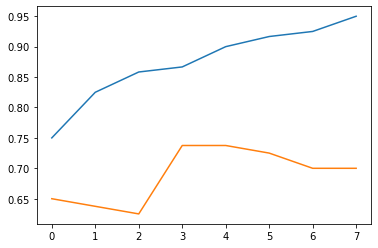

In [37]:
plt.plot(train_)
plt.plot(test_)

<h2 id="evaluation">Bagging  for classification with  Scikit-learn</h2>
A Bagging classifier is an ensemble model that trains  base classifiers  on random subsets   of the original dataset  (Bootstrap Sampling by default), and then aggregate their individual predictions by voting. We import the module:

In [38]:
from sklearn.ensemble import BaggingClassifier

Bagging improves models that suffer from overfitting; they do well on the training data, but they do not Generalize well. Decision Trees are a prime candidate for this reason, in addition, they are fast to train; We create a <code>BaggingClassifier</code> object,  with a Decision Tree as the <code>base_estimator</code>


In [39]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion="entropy", max_depth = 4,random_state=2),n_estimators=30,random_state=0,bootstrap=True)

We fit the model:

In [40]:
Bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        max_depth=4,
                                                        random_state=2),
                  n_estimators=30, random_state=0)

The method <code>predict</code>  aggregates the predictions by voting:

In [41]:
Bag.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

We see the training accuracy is slightly better but the test accuracy improves  dramatically:

In [42]:
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.6875, 'train Accuracy': 0.9416666666666667}


Here we can see the impact of adding more estimators (Decision Trees) using in Bagging on the testing and training accuracy

100%|██████████| 20/20 [01:18<00:00,  3.92s/it]


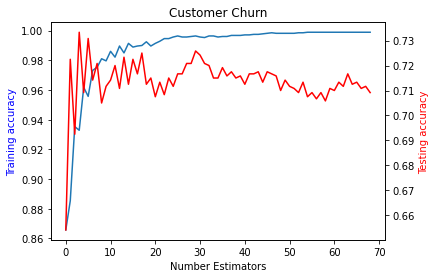

In [43]:
get_accuracy_bag(X, y, "Customer Churn")

## Low Variance Example 

Bagging does not improve result if the model has low Variance i.e. does reasonably well on the test and training data. Consider the SVM; the accuracy on the tests data and training data are similar 

In [44]:
from sklearn.svm import SVC

clf=SVC(kernel='linear',gamma='scale')
clf.fit(X_train, y_train) 
print(get_accuracy(X_train, X_test, y_train, y_test,  clf))

{'test Accuracy': 0.6875, 'train Accuracy': 0.775}


Bagging the SVM does almost nothing:

In [45]:
Bag = BaggingClassifier(base_estimator=SVC(kernel='linear',gamma='scale'),n_estimators=10,random_state=0,bootstrap=True)
Bag.fit(X_train,y_train)
print(get_accuracy(X_train, X_test, y_train, y_test,  Bag))

{'test Accuracy': 0.6625, 'train Accuracy': 0.7916666666666666}


 ## Random  Forest

 Random forests are a combination of trees such that each tree depends on a random subset of the features and data. As a result, each tree in the forest is different and usually performs better than Bagging. The most important parameters are the number of trees and the number of features to sample. First we import RandomForestClassifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

 Like Bagging, increasing the number of trees improves results and does not lead to overfiting in most cases; but the improvements plateau as you add more trees. For this example  the number of trees in the forest (default=100)

In [47]:
n_estimators=20 

max_features    m the number of features to consider when looking for the best split. If we have M features denoted by:

In [48]:
M_features=X.shape[1]
max_features=round(np.sqrt(M_features))-1
max_features

2

In [49]:
model = RandomForestClassifier( max_features=max_features,n_estimators=n_estimators, random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=20, random_state=0)

In [50]:
 print(get_accuracy(X_train, X_test, y_train, y_test, model)) 

{'test Accuracy': 0.7625, 'train Accuracy': 1.0}


<h2 id="practice">Practice: Cancer data</h2>

The example is based on a dataset that is publicly available from the UCI Machine Learning Repository (Asuncion and Newman, 2007)[http://mlearn.ics.uci.edu/MLRepository.html]. The dataset consists of several hundred human cell sample records, each of which contains the values of a set of cell characteristics. The fields in each record are:

| Field name  | Description                 |
| ----------- | --------------------------- |
| ID          | Clump thickness             |
| Clump       | Clump thickness             |
| UnifSize    | Uniformity of cell size     |
| UnifShape   | Uniformity of cell shape    |
| MargAdh     | Marginal adhesion           |
| SingEpiSize | Single epithelial cell size |
| BareNuc     | Bare nuclei                 |
| BlandChrom  | Bland chromatin             |
| NormNucl    | Normal nucleoli             |
| Mit         | Mitoses                     |
| Class       | Benign or malignant         |

<br>
<br>

Let's load the dataset:


In [51]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/cell_samples.csv")

df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


Now lets remove rows that have a ? in the `BareNuc` column

In [52]:
df = df[df["BareNuc"] != "?"]

Now lets define the X and y for our dataset

In [53]:
X =  df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]

X.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1


In [54]:
y = df['Class']

y.head()

0    2
1    2
2    2
3    2
4    2
Name: Class, dtype: int64

Now lets split our data into training and testing data with a 80/20 split

In [55]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (546, 9) (546,)
Test set: (137, 9) (137,)


Now to determine the best parameters for `n_estimators` and the `max_depth` of the `base_estimator` we will use `GridSearchCV`

In [56]:
from sklearn.model_selection import GridSearchCV

We can use GridSearch for Exhaustive search over specified parameter values. To  alter the base  model; we add the double underscore and the attribute value:

Here we are searching odd numbers from 1 to 39 for `n_estimators` and odd numbers from 1 to 20 for `max_depth` in the `base_estimator`

In [57]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
     'base_estimator__max_depth' : [2*n+1 for n in range(10) ] }

Create a `BaggingClassifier` object called `Bag` with the `base_estimator` set to a `DecisionTreeClassifier` object where `random_state` = 0 and `bootstrap` = True

In [58]:
Bag = BaggingClassifier(base_estimator = DecisionTreeClassifier(), random_state=0, bootstrap=True)

Now we create a `GridSearchCV` object and search for the best parameters according to our `parameter_grid`

In [59]:
search = GridSearchCV(estimator=Bag, param_grid=param_grid, scoring='accuracy', cv=3)

In [60]:
search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                                         random_state=0),
             param_grid={'base_estimator__max_depth': [1, 3, 5, 7, 9, 11, 13,
                                                       15, 17, 19],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

We can see the best accuracy score of the searched parameters was ~97%

In [61]:
search.best_score_

0.9688644688644689

We can also see the parameters that resulted in the best score

In [62]:
search.best_params_

{'base_estimator__max_depth': 5, 'n_estimators': 11}

And we can see the testing and training accuracy of the best estimator

In [63]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9853479853479854}


lets do the same for 

 ## Random Forest

 We can use GridSearch for Exhaustive search over specified parameter values.We see many of the parameters are similar to Classification trees; let's try different parameter for max_depth, max_features and n_estimators.

In [64]:
param_grid = {'n_estimators': [2*n+1 for n in range(20)],
             'max_depth' : [2*n+1 for n in range(10) ],
             'max_features':["auto", "sqrt", "log2"]}

 We create the Grid Search object and fit it:

In [65]:
search = GridSearchCV(estimator=model, param_grid=param_grid,scoring='accuracy')
search.fit(X_train, y_train)

C:\Users\rmt10\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rmt10\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\rmt10\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for 

GridSearchCV(estimator=RandomForestClassifier(max_features=2, n_estimators=20,
                                              random_state=0),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21,
                                          23, 25, 27, 29, 31, 33, 35, 37, 39]},
             scoring='accuracy')

 We can see the best accuracy score of the searched parameters:

In [66]:
search.best_score_

0.9798999165971644

We can calculate accuracy on the test data using the test data:

In [67]:
print(get_accuracy(X_train, X_test, y_train, y_test, search.best_estimator_))

{'test Accuracy': 0.9708029197080292, 'train Accuracy': 0.9926739926739927}


 <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>